# Project 2: Data Cleanin & EDA

### Imports & Upgrades

In [3]:
!pip install --upgrade pandas numpy matplotlib seaborn

Requirement already up-to-date: pandas in /opt/anaconda3/lib/python3.8/site-packages (2.0.3)
Requirement already up-to-date: numpy in /opt/anaconda3/lib/python3.8/site-packages (1.24.4)
Requirement already up-to-date: matplotlib in /opt/anaconda3/lib/python3.8/site-packages (3.7.5)
Requirement already up-to-date: seaborn in /opt/anaconda3/lib/python3.8/site-packages (0.13.2)


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [4]:
from sklearn.model_selection import train_test_split

### Read & Clean Data(test_data)

In [5]:
test_data = pd.read_csv('../data/test.csv')  
print(test_data.head())
print(test_data.columns)

     Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour  ... 3Ssn Porch Screen Porch Pool Area Pool QC  \
0  Grvl       Reg          Lvl  ...          0            0         0     NaN   
1   NaN       IR1          Lvl  ...          0            0         0     NaN   
2   NaN       IR1          Lvl  ...          0            0         0     NaN   
3   NaN       Reg          Lvl  ...          0            0         0     NaN   
4   NaN       IR1          Lvl  ...          0          185         0     NaN   

  Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Typ

In [12]:
print("Test Data Shape: {} rows, and {} columns".format(test_data.shape[0],test_data.shape[1]))

Test Data Shape: 878 rows, and 80 columns


In [20]:
test_data.columns = (
    test_data.columns
    .str.lower()
    .str.replace(r"[ /()-]", "_", regex=True)  # Replace spaces/special characters with "_"
    .str.strip()  # Remove extra spaces
)

test_data[columns_to_fill] = test_data[columns_to_fill].fillna(0)  # Fill missing values with 0 (same approach as train_data)

print(f"Test Data Shape: {test_data.shape[0]} rows, and {test_data.shape[1]} columns")


Test Data Shape: 878 rows, and 80 columns


In [34]:
print(test_data.select_dtypes(include=['object']).columns)


Index(['ms_zoning', 'street', 'alley', 'lot_shape', 'land_contour',
       'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl',
       'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heating_qc',
       'central_air', 'electrical', 'kitchen_qual', 'functional',
       'fireplace_qu', 'garage_type', 'garage_finish', 'garage_qual',
       'garage_cond', 'paved_drive', 'pool_qc', 'fence', 'misc_feature',
       'sale_type'],
      dtype='object')


In [21]:
print(test_data.head())


     id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           0.0      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           0.0      9500   Pave   

  alley lot_shape land_contour  ... 3ssn_porch screen_porch pool_area pool_qc  \
0  Grvl       Reg          Lvl  ...          0            0         0       0   
1     0       IR1          Lvl  ...          0            0         0       0   
2     0       IR1          Lvl  ...          0            0         0       0   
3     0       Reg          Lvl  ...          0            0         0       0   
4     0       IR1          Lvl  ...          0          185         0       0   

  fence misc_feature misc_val mo_sold  yr_sold  sale_typ

### Read & Clean Data(train_data)

In [16]:
train_data = pd.read_csv('../data/train.csv')
print(train_data.head())

    Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   
2       Reg          Lvl  ...            0         0     NaN   NaN   
3       Reg          Lvl  ...            0         0     NaN   NaN   
4       IR1          Lvl  ...            0         0     NaN   NaN   

  Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0          NaN        0     

In [17]:
train_data.columns = (
    train_data.columns
    .str.lower()
    .str.replace(r"[ /()-]", "_", regex=True)  # Replace spaces and special characters with "_"
    .str.strip()  # Remove extra spaces
)

print(train_data.columns)


Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod_add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

In [18]:
print("Train Data Shape: {} rows, and {} columns".format(train_data.shape[0],train_data.shape[1]))

Train Data Shape: 2051 rows, and 81 columns


In [19]:
columns_to_fill = [
    "mas_vnr_type", "fence", "alley", "misc_feature", "pool_qc",
    "garage_finish", "garage_yr_blt", "garage_cond", "lot_frontage", "fireplace_qu",
    "bsmtfin_type_1", "bsmtfin_type_2", "bsmt_exposure", "garage_type", "garage_qual",
    "bsmt_half_bath", "bsmt_full_bath", "mas_vnr_area", "bsmt_qual", "bsmt_cond",
    "bsmt_unf_sf", "bsmtfin_sf_2","garage_area", "garage_cars", "bsmtfin_sf_1", "total_bsmt_sf"
]
train_data[columns_to_fill] = train_data[columns_to_fill].fillna(0)
print(f"Train Data Shape: {train_data.shape[0]} rows, and {train_data.shape[1]} columns")

Train Data Shape: 2051 rows, and 81 columns


In [22]:
train_data.isnull().sum().sort_values(ascending=True)

id                0
fireplaces        0
functional        0
totrms_abvgrd     0
kitchen_qual      0
                 ..
roof_matl         0
roof_style        0
year_remod_add    0
total_bsmt_sf     0
saleprice         0
Length: 81, dtype: int64

In [31]:
print(train_data.select_dtypes(include=['object']).columns)

Index(['ms_zoning', 'street', 'alley', 'lot_shape', 'land_contour',
       'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl',
       'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heating_qc',
       'central_air', 'electrical', 'kitchen_qual', 'functional',
       'fireplace_qu', 'garage_type', 'garage_finish', 'garage_qual',
       'garage_cond', 'paved_drive', 'pool_qc', 'fence', 'misc_feature',
       'sale_type'],
      dtype='object')


In [35]:
print(train_data.describe)

<bound method NDFrame.describe of         id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
0      109  533352170           60        RL           0.0     13517   Pave   
1      544  531379050           60        RL          43.0     11492   Pave   
2      153  535304180           20        RL          68.0      7922   Pave   
3      318  916386060           60        RL          73.0      9802   Pave   
4      255  906425045           50        RL          82.0     14235   Pave   
...    ...        ...          ...       ...           ...       ...    ...   
2046  1587  921126030           20        RL          79.0     11449   Pave   
2047   785  905377130           30        RL           0.0     12342   Pave   
2048   916  909253010           50        RL          57.0      7558   Pave   
2049   639  535179160           20        RL          80.0     10400   Pave   
2050    10  527162130           60        RL          60.0      7500   Pave   

     alley lot_sh

In [36]:
train_data.to_csv("../data/cleaned_train.csv", index=False)
test_data.to_csv("../data/cleaned_test.csv", index=False)

print("Cleaned datasets saved successfully!")


Cleaned datasets saved successfully!


# Plots

#### House Price Histogram(Right skewed distribution)

The cheapest house sold for $12,789 and the most expensive for $611,657
The average sales price is $181,470, while median is $162,500


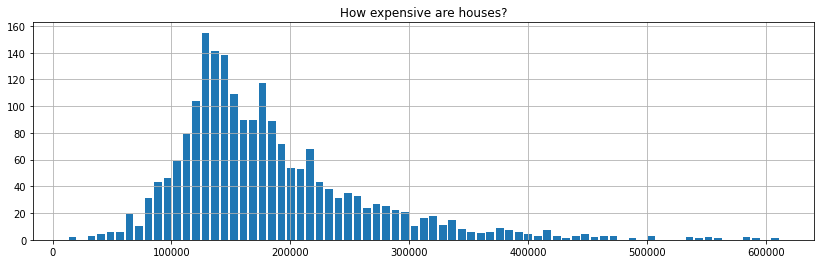

In [20]:
print('The cheapest house sold for ${:,.0f} and the most expensive for ${:,.0f}'.format(
    train_data.saleprice.min(), train_data.saleprice.max()))

print('The average sales price is ${:,.0f}, while median is ${:,.0f}'.format(
    train_data.saleprice.mean(), train_data.saleprice.median()))


train_data.saleprice.hist(bins=75, rwidth=0.8, figsize=(14,4)) # saleprice histogram

plt.title('How expensive are houses?')

plt.show()


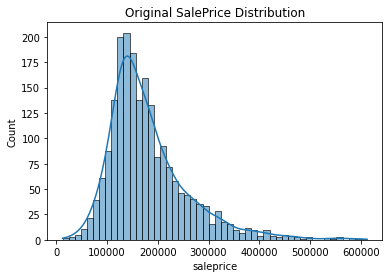

In [22]:
sns.histplot(train_data["saleprice"], bins=50, kde=True)
plt.title("Original SalePrice Distribution")
plt.show()


#### House Price by Overall Quality (Box Plot)

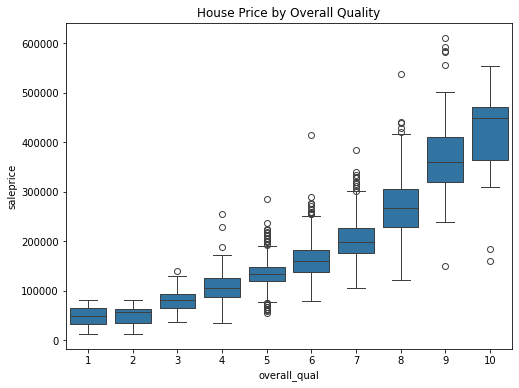

In [99]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='overall_qual', y='saleprice', data=train_data)
title = plt.title('House Price by Overall Quality')

#### Correlation between Features and SalePrice(clearly visible 'overall_qual', 'gr_liv_area', 'garage_cars', 'garage_area'being among higly positively correlated to SalePrice)

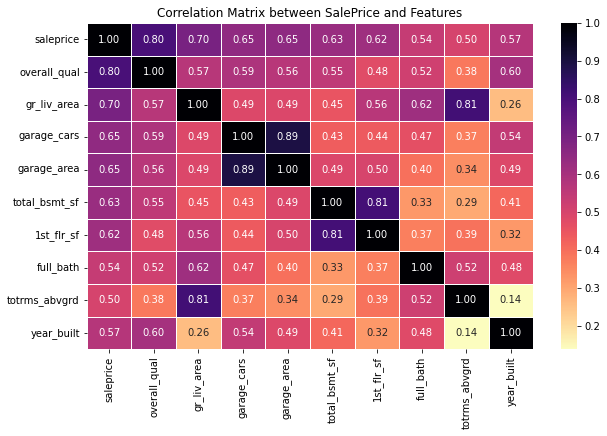

In [25]:
features = [
    "saleprice", "overall_qual", "gr_liv_area", "garage_cars", "garage_area",
    "total_bsmt_sf", "1st_flr_sf", "full_bath", "totrms_abvgrd", "year_built"
]

# Compute correlation matrix
corr_matrix = train_data[features].corr()

# Set figure size
plt.figure(figsize=(10,6))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="magma_r", linewidths=0.5)

# Title and display
plt.title("Correlation Matrix between SalePrice and Features")
plt.show()


#### House Price by Year built vs. Sale Price (Scatter Plot)

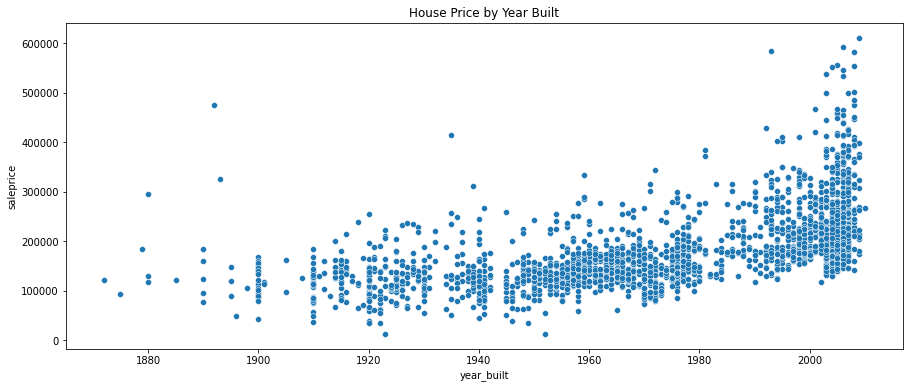

In [27]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='year_built', y='saleprice', data=train_data)
plt.title('House Price by Year Built')  # Closing parenthesis added
plt.show()  # Show the plot

In [28]:
print(train_data.head())  # Check if train_data is available


    id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street alley  \
0  109  533352170           60        RL           0.0     13517   Pave     0   
1  544  531379050           60        RL          43.0     11492   Pave     0   
2  153  535304180           20        RL          68.0      7922   Pave     0   
3  318  916386060           60        RL          73.0      9802   Pave     0   
4  255  906425045           50        RL          82.0     14235   Pave     0   

  lot_shape land_contour  ... screen_porch pool_area pool_qc fence  \
0       IR1          Lvl  ...            0         0       0     0   
1       IR1          Lvl  ...            0         0       0     0   
2       Reg          Lvl  ...            0         0       0     0   
3       Reg          Lvl  ...            0         0       0     0   
4       IR1          Lvl  ...            0         0       0     0   

  misc_feature misc_val mo_sold yr_sold  sale_type  saleprice  
0            0        0     

#### Individual Feature vs. Sale Price (Scatter Plot)

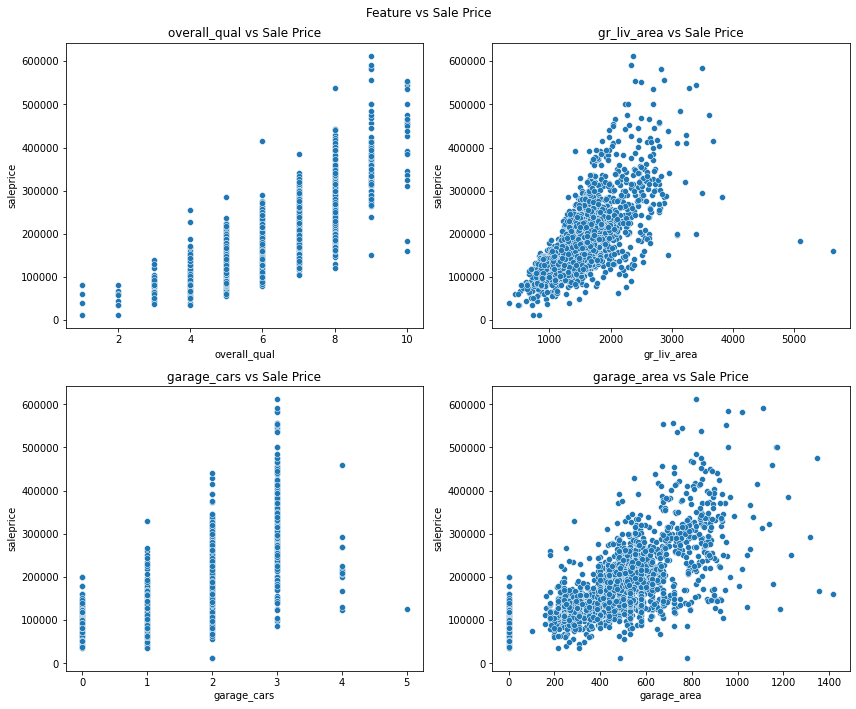

In [40]:
features = ['overall_qual', 'gr_liv_area', 'garage_cars', 'garage_area']
y = train_data['saleprice']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Feature vs Sale Price')

for i, feature in enumerate(features):
    row, col = divmod(i, 2)
    sns.scatterplot(x=train_data[feature], y=y, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} vs Sale Price')

plt.tight_layout()
plt.show()

#### Pair Plot for Feature Relationships

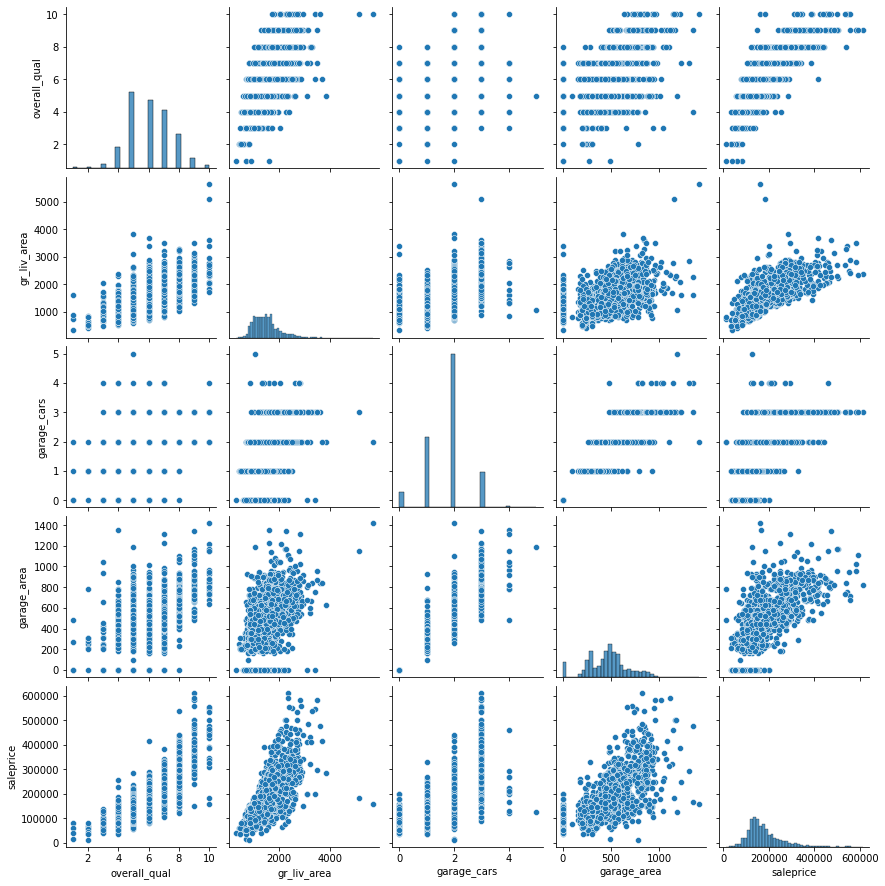

In [44]:
sns.pairplot(train_data[features + ['saleprice']])
plt.show()


#### Regression linear model for Each Feature vs SalesPrice


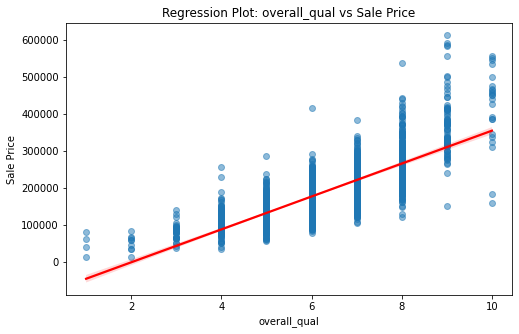

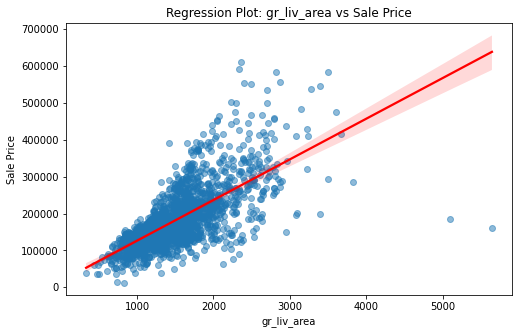

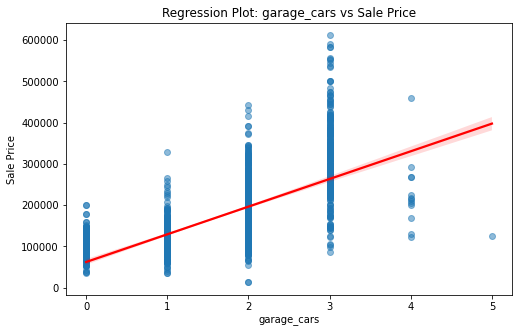

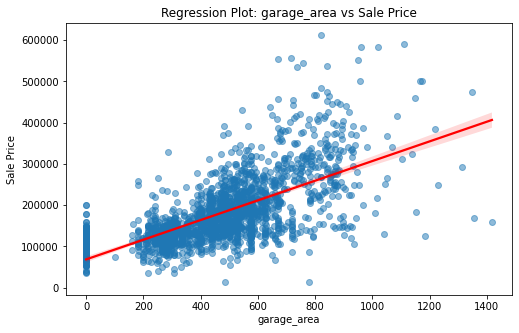

In [53]:
eatures = ['gr_liv_area', 'garage_area']
y = train_data['saleprice']

for feature in features:
    plt.figure(figsize=(8, 5))
    sns.regplot(x=train_data[feature], y=y, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.title(f'Regression Plot: {feature} vs Sale Price')
    plt.show()